In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import numpy as np
import pandas as pd
from numpy import sqrt
from scipy.special import erf
from scipy.stats import norm

In [6]:
MAX_VALUE = 8 * 1e8

In [13]:
def reward_distribution(p: float):
    if p <= 0.5:
        return 0
    elif p <= 0.6:
        return 1
    elif p <= 0.7:
        return 2
    elif p <= 0.8:
        return 3
    elif p <= 0.9:
        return 5
    elif p <= 0.92:
        return 8
    elif p <= 0.94:
        return 13
    elif p <= 0.95:
        return 21
    elif p <= 0.96:
        return 34
    elif p <= 0.97:
        return 55
    elif p <= 98.:
        return 89
    else:
        return 143

Score max: 799924234.8966382
Score min: -799940513.3128415


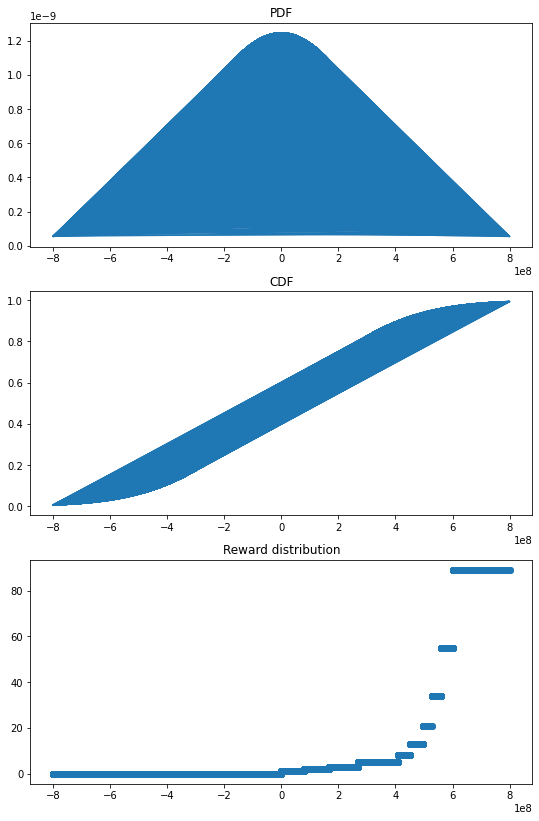

In [14]:
sigma = MAX_VALUE / 2.5
scores = np.random.normal(0, sigma, int(1e5))
scores = scores[scores <= MAX_VALUE]
scores = scores[scores >= -MAX_VALUE]
print(f'Score max: {scores.max()}')
print(f'Score min: {scores.min()}')

fig, ax = plt.subplots(nrows=3, figsize=(9, 14))
values_1 = pd.Series(norm.pdf(scores, loc=0, scale=sigma))
values_2 = pd.Series(norm.cdf(scores, loc=0, scale=sigma))
reward_values = values_2.apply(reward_distribution)
ax[0].plot(scores, values_1)
ax[0].set_title('PDF')
ax[1].plot(scores, values_2)
ax[1].set_title('CDF')
ax[2].scatter(scores, reward_values)
ax[2].set_title('Reward distribution')
plt.show()

In [8]:
norm.cdf(0, loc=0, scale=sigma)

0.5

In [9]:
norm.cdf(-MAX_VALUE, loc=0, scale=sigma)

0.006209665325776132

In [10]:
norm.cdf(MAX_VALUE, loc=0, scale=sigma)

0.9937903346742238

In [12]:
norm.cdf(2 * MAX_VALUE, loc=0, scale=sigma)

0.9999997133484281